In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canada-per-capita-income-single-variable-data-set/canada_per_capita_income.csv


In [2]:
# My first analysis in kaggle using linear regression
# I thought of creating a descriptive analysis, so i can practice to write more understable code.
# since I am new to this, suggestions are welcomed :)

In [3]:
# first thing first!, importing data
df = pd.read_csv("../input/canada-per-capita-income-single-variable-data-set/canada_per_capita_income.csv")
df.head() # What's inside df?

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.shape # self explanatory --> result > (rows, cols)

(47, 2)

In [5]:
df.info() # Does df contain null values? if not what's the data type stored in each cols?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [6]:
df.describe() # Some stats

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


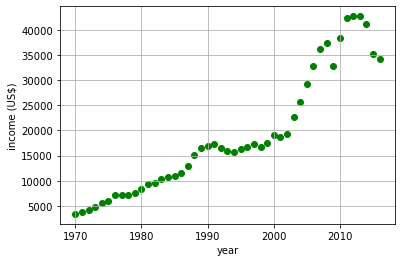

In [7]:
# plot! 
import matplotlib.pyplot as plt 

plt.scatter(df["year"], df["per capita income (US$)"], color="g")
plt.xlabel("year")
plt.ylabel("income (US$)")
plt.grid(True)
plt.show()

In [9]:
# objective - to find perfect slope
# slope formula -> y = m*x + c  (y - dependant variable, x - independant variable) 
# so what's x and y in our df?
# since per capita income depends on the year, (income - dependent on year, year - independant)
# therefore x -> year, y -> per capita income

x = df[["year"]].values
# ^ best approch df.iloc[:, 0:1] but i find this to be more descriptive ;) and there is only two cols.
# using [["year"]] because we need 2-d array for our model's function since it requires independant variable.

y = df["per capita income (US$)"].values
# ^ best approch df.iloc[:, -1]
# since income is dependant, no need of converting it into 2-d

In [10]:
# time for linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # instantiate object that can access methods/func from LinearRegression() class 
lr.fit(x, y)            # using fit function from LinearRegression() class using our lr object to fit variables(x,y)

LinearRegression()

In [11]:
# hmm. model trained, Let's find slope using formula and with help of our lr model

m = lr.coef_      # to find co-efficient of x (i.e: m)
c = lr.intercept_ # to find intercept c

y = m*x + c
y[:3]   # and thats how we found our slope

array([[-134.55966672],
       [ 693.9054085 ],
       [1522.37048373]])

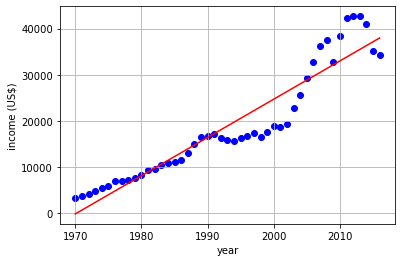

In [12]:
# where is the slope passin thro?
x = df[["year"]]
y = df["per capita income (US$)"]
plt.scatter(x, y, color="b")
plt.plot(x, lr.predict(x), color="r")
plt.xlabel("year")
plt.ylabel("income (US$)")
plt.grid(True)
plt.show()

In [13]:
# predicting per capita income for 2020

lr.predict([[2020]])  # pretty straightforward, right? using predict function and passing our input as 2-d array.
# and that's how its done! 

array([41288.69409442])

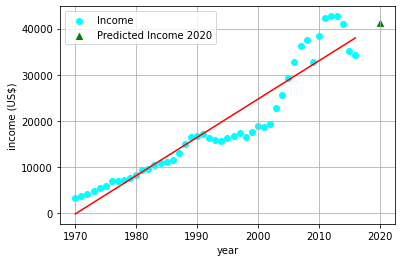

In [14]:
# all in one plot

y_prediction = lr.predict(x)  # prediction for df["years"] by lr model

plt.scatter(x, y, color="aqua", label="Income")  # plotting Actual df
plt.scatter([[2020]], lr.predict([[2020]]), color="g", marker="^", label="Predicted Income 2020") # plotting Predicted Price
plt.plot(x, y_prediction, color="r") # plotting slope
plt.xlabel("year")
plt.ylabel("income (US$)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# tesing with new inputs
# creating new df -> test_df

test_df = pd.DataFrame({
    "test_yr": [2021, 2022, 2023, 2025, 2026]
})

In [16]:
# Predict income for upcoming years

test_df["pred_income"] = lr.predict(test_df[["test_yr"]]) # creating new col and storing predictions
test_df

,test_yr,pred_income
0,2021,42117.159170
1,2022,42945.624245
2,2023,43774.089320
3,2025,45431.019471
4,2026,46259.484546
